# Sydney Data - Wrangling, Analysis and Insights

## Data Wrangling

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the bicycle_survey and bicycle_sites csv as Dataframes.
bicycle_survey = pd.read_csv("Bicycle_count_surveys.csv")
bicycle_site = pd.read_csv("Bicycle_count_sites.csv")

In [3]:
# View the each DataFrame.
bicycle_survey.head()

,SiteID,Month,Year,TotalCount,ObjectId2,Time_0600,Time_0700,Time_0800,Time_1600,Time_1700,Time_1800
0,51,March,2010,263,1,12,45,56,27,56,67
1,1,October,2015,383,2,37,69,100,47,68,62
2,52,March,2010,136,3,7,18,31,29,30,21
3,53,March,2010,333,4,25,86,93,15,62,52
4,2,October,2015,447,5,32,75,72,56,114,98


In [11]:
# Rename the columns for easier understanding.
bicycle_survey.rename(columns = {"Time_0600":"0600-0700",
                              "Time_0700":"0700-0800",
                              "Time_0800":"0800-0900",
                              "Time_1600":"1600-1700",
                              "Time_1700":"1700-1800",
                              "Time_1800":"1800-1900"},
                             inplace=True)

# View the DataFrame.
bicycle_survey.head()

,SiteID,Month,Year,TotalCount,ObjectId2,0600-0700,0700-0800,0800-0900,1600-1700,1700-1800,1800-1900
0,51,March,2010,263,1,12,45,56,27,56,67
1,1,October,2015,383,2,37,69,100,47,68,62
2,52,March,2010,136,3,7,18,31,29,30,21
3,53,March,2010,333,4,25,86,93,15,62,52
4,2,October,2015,447,5,32,75,72,56,114,98


In [13]:
# Create a new column showing the difference of total count and all the times.
bicycle_survey["Difference_in_totals"] = bicycle_survey["TotalCount"]\
                                        -bicycle_survey["0600-0700"]\
                                        -bicycle_survey["0700-0800"]\
                                        -bicycle_survey["0800-0900"]\
                                        -bicycle_survey["1600-1700"]\
                                        -bicycle_survey["1700-1800"]\
                                        -bicycle_survey["1800-1900"]
# View the DataFrame.
bicycle_survey.head()

,SiteID,Month,Year,TotalCount,ObjectId2,0600-0700,0700-0800,0800-0900,1600-1700,1700-1800,1800-1900,Difference_in_totals
0,51,March,2010,263,1,12,45,56,27,56,67,0
1,1,October,2015,383,2,37,69,100,47,68,62,0
2,52,March,2010,136,3,7,18,31,29,30,21,0
3,53,March,2010,333,4,25,86,93,15,62,52,0
4,2,October,2015,447,5,32,75,72,56,114,98,0


In [37]:
# Filter the DataFrame using Differences = 0.
# WE consider difference <> 0 as outliers or mistakes in the dataset.
bicycle_survey_new = bicycle_survey[bicycle_survey["Difference_in_totals"]==0]

# Sort the dataset by Year in ascending order.
bicycle_survey_new.sort_values(by="Year",ascending=True)

,SiteID,Month,Year,TotalCount,ObjectId2,0600-0700,0700-0800,0800-0900,1600-1700,1700-1800,1800-1900,Difference_in_totals
0,51,March,2010,263,1,12,45,56,27,56,67,0
159,31,March,2010,211,160,15,18,41,31,56,50,0
160,32,March,2010,159,161,7,27,45,13,45,22,0
161,33,March,2010,243,162,23,41,70,22,46,41,0
162,34,March,2010,66,163,4,4,12,10,21,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2158,16,March,2022,320,2238,33,63,91,34,47,52,0
2157,11,March,2022,1525,2237,95,230,360,178,339,323,0
2155,110,March,2022,81,2235,6,10,18,11,20,16,0
2164,71,March,2022,872,2244,44,127,169,132,202,198,0


In [38]:
bicycle_site.head()

,X,Y,OBJECTID,SiteID,Intersection
0,151.204168,-33.882846,1,1,"Intersection of Broadway, Lee Street, Quay Str..."
1,151.208601,-33.878286,2,2,Intersection of Castlereagh Street and Goulbur...
2,151.205783,-33.863364,3,3,Intersection of Grosvenor Street and Glouceste...
3,151.209897,-33.873292,4,4,Intersection of Elizabeth Street and Park Street
4,151.209083,-33.879797,5,5,"Intersection of Elizabeth Street, Wentworth Av..."


In [39]:
# Join the two datasets for completeness.
bicycle_merge = pd.merge(bicycle_survey_new,bicycle_site,how="left")

In [40]:
bicycle_merge.shape

(2186, 16)

In [ ]:
# Drop unnecessary columns from the merged DataFrame
bicycle_merge = bicycle_merge.drop(["ObjectId2","OBJECTID","Difference_in_totals"],axis=1)
bicycle_merge = bicycle_merge.drop(["Difference_in_totals"],axis=1)

In [55]:
# View the DataFrame.
bicycle_merge

,SiteID,Month,Year,TotalCount,0600-0700,0700-0800,0800-0900,1600-1700,1700-1800,1800-1900,X,Y,Intersection
0,51,March,2010,263,12,45,56,27,56,67,151.178546,-33.884410,Intersection of Pyrmont Bridge Road and Lyons ...
1,1,October,2015,383,37,69,100,47,68,62,151.204168,-33.882846,"Intersection of Broadway, Lee Street, Quay Str..."
2,52,March,2010,136,7,18,31,29,30,21,151.175307,-33.883012,Intersection of Wigram Road and Booth Street
3,53,March,2010,333,25,86,93,15,62,52,151.188250,-33.876658,"Intersection of Bridge Road, Darling Street an..."
4,2,October,2015,447,32,75,72,56,114,98,151.208601,-33.878286,Intersection of Castlereagh Street and Goulbur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,86,March,2022,998,72,134,236,138,235,183,151.215319,-33.887142,Intersection of Bourke Street and Phelps Street
2182,76,March,2022,856,59,160,191,103,177,166,151.191590,-33.870635,Intersection of Miller Street and Saunders Street
2183,79,March,2022,554,32,77,122,79,116,128,151.194928,-33.871425,Intersection of Pyrmont Bridge Road and Harris...
2184,82,March,2022,1018,42,156,244,143,227,206,151.202308,-33.891879,Intersection of George Street and Wells Street


In [56]:
# Subset the dataframe to retain relevant columns.
# We will identify any interesting SiteIDs and join them using the latitude, longitude or intersectoin date post-analysis.
bicycle_merge2 = bicycle_merge[["SiteID",
                                "Month",
                                "Year",
                                "TotalCount",
                                "0600-0700",
                                "0700-0800",
                                "0800-0900",
                               "1600-1700",
                                "1700-1800",
                                "1800-1900"]]

# View the dataframe.
bicycle_merge2.head()

,SiteID,Month,Year,TotalCount,0600-0700,0700-0800,0800-0900,1600-1700,1700-1800,1800-1900
0,51,March,2010,263,12,45,56,27,56,67
1,1,October,2015,383,37,69,100,47,68,62
2,52,March,2010,136,7,18,31,29,30,21
3,53,March,2010,333,25,86,93,15,62,52
4,2,October,2015,447,32,75,72,56,114,98


In [71]:
# Convert the table to long form to make make faceted visualisations.
bicycle_merge2 = bicycle_merge2.melt(id_vars=["SiteID",
                                              "Month",
                                              "Year",
                                              "TotalCount"],
                                     var_name="Time",
                                     value_name="Count").reset_index()

In [73]:
# View the resultant dataframe.
bicycle_merge2

,index,SiteID,Month,Year,TotalCount,Time,Count
0,0,51,March,2010,263,0600-0700,12
1,1,1,October,2015,383,0600-0700,37
2,2,52,March,2010,136,0600-0700,7
3,3,53,March,2010,333,0600-0700,25
4,4,2,October,2015,447,0600-0700,32
...,...,...,...,...,...,...,...
13111,13111,86,March,2022,998,1800-1900,183
13112,13112,76,March,2022,856,1800-1900,166
13113,13113,79,March,2022,554,1800-1900,128
13114,13114,82,March,2022,1018,1800-1900,206


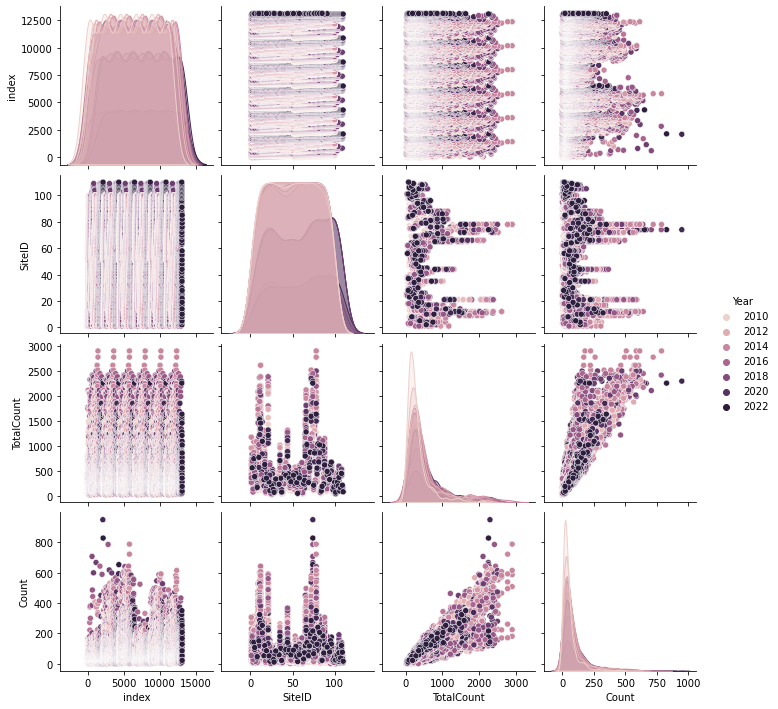

In [75]:
# Create a facetplot of row = TIme, column = year, hue = month
# Create a second one unique siteID groupings or longitude latitude groupings

sns.pairplot(data = bicycle_merge2,
            hue="Year")

# DATA VISUALISATION AND ANALYSIS

NameError: name 'bicyle_merge_catplot' is not defined

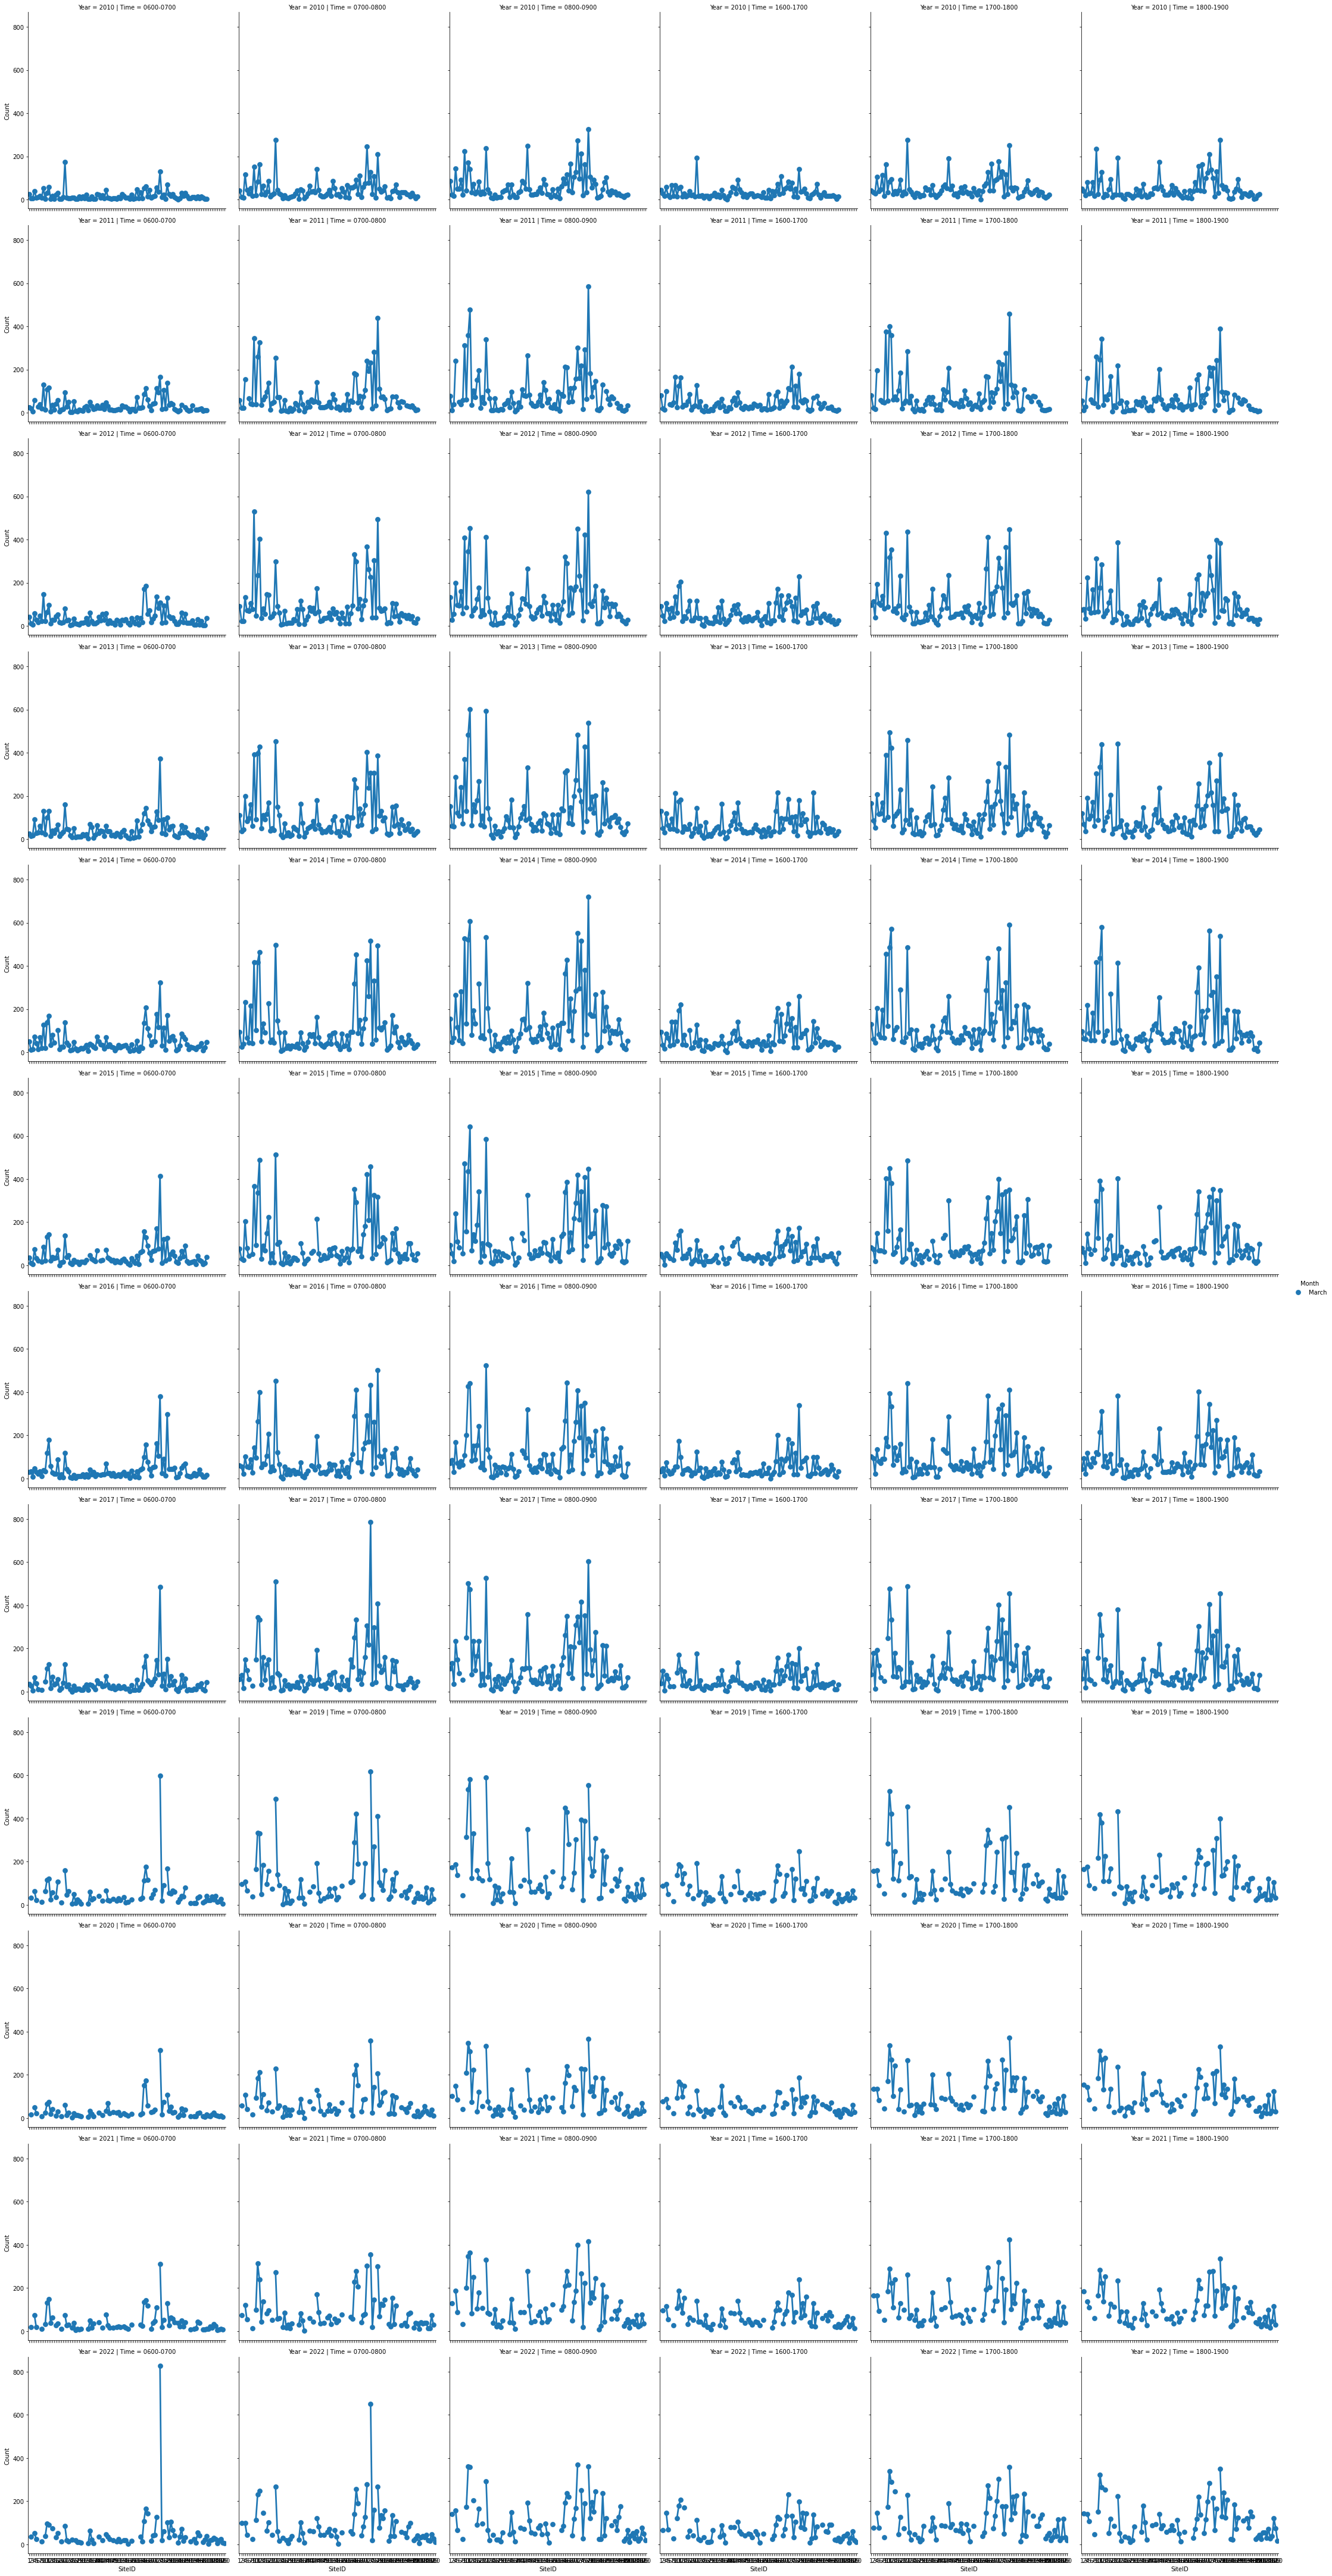

In [88]:
# Create a faceted scatterplot showing how counts vary by site id over the years and time.
# For March Only.
bicycle_merge2_catplot = sns.catplot(
                            x="SiteID",
                            y= "Count",
                            row= "Year",
                            col= "Time",
                            kind="point",
                            hue="Month",
                            data=bicycle_merge2[bicycle_merge2["Month"]=="March"]) 

# Save the large visualisation for analysis.
bicyle_merge2_catplot.figsave("Caplot1.jpg",dpi=480)

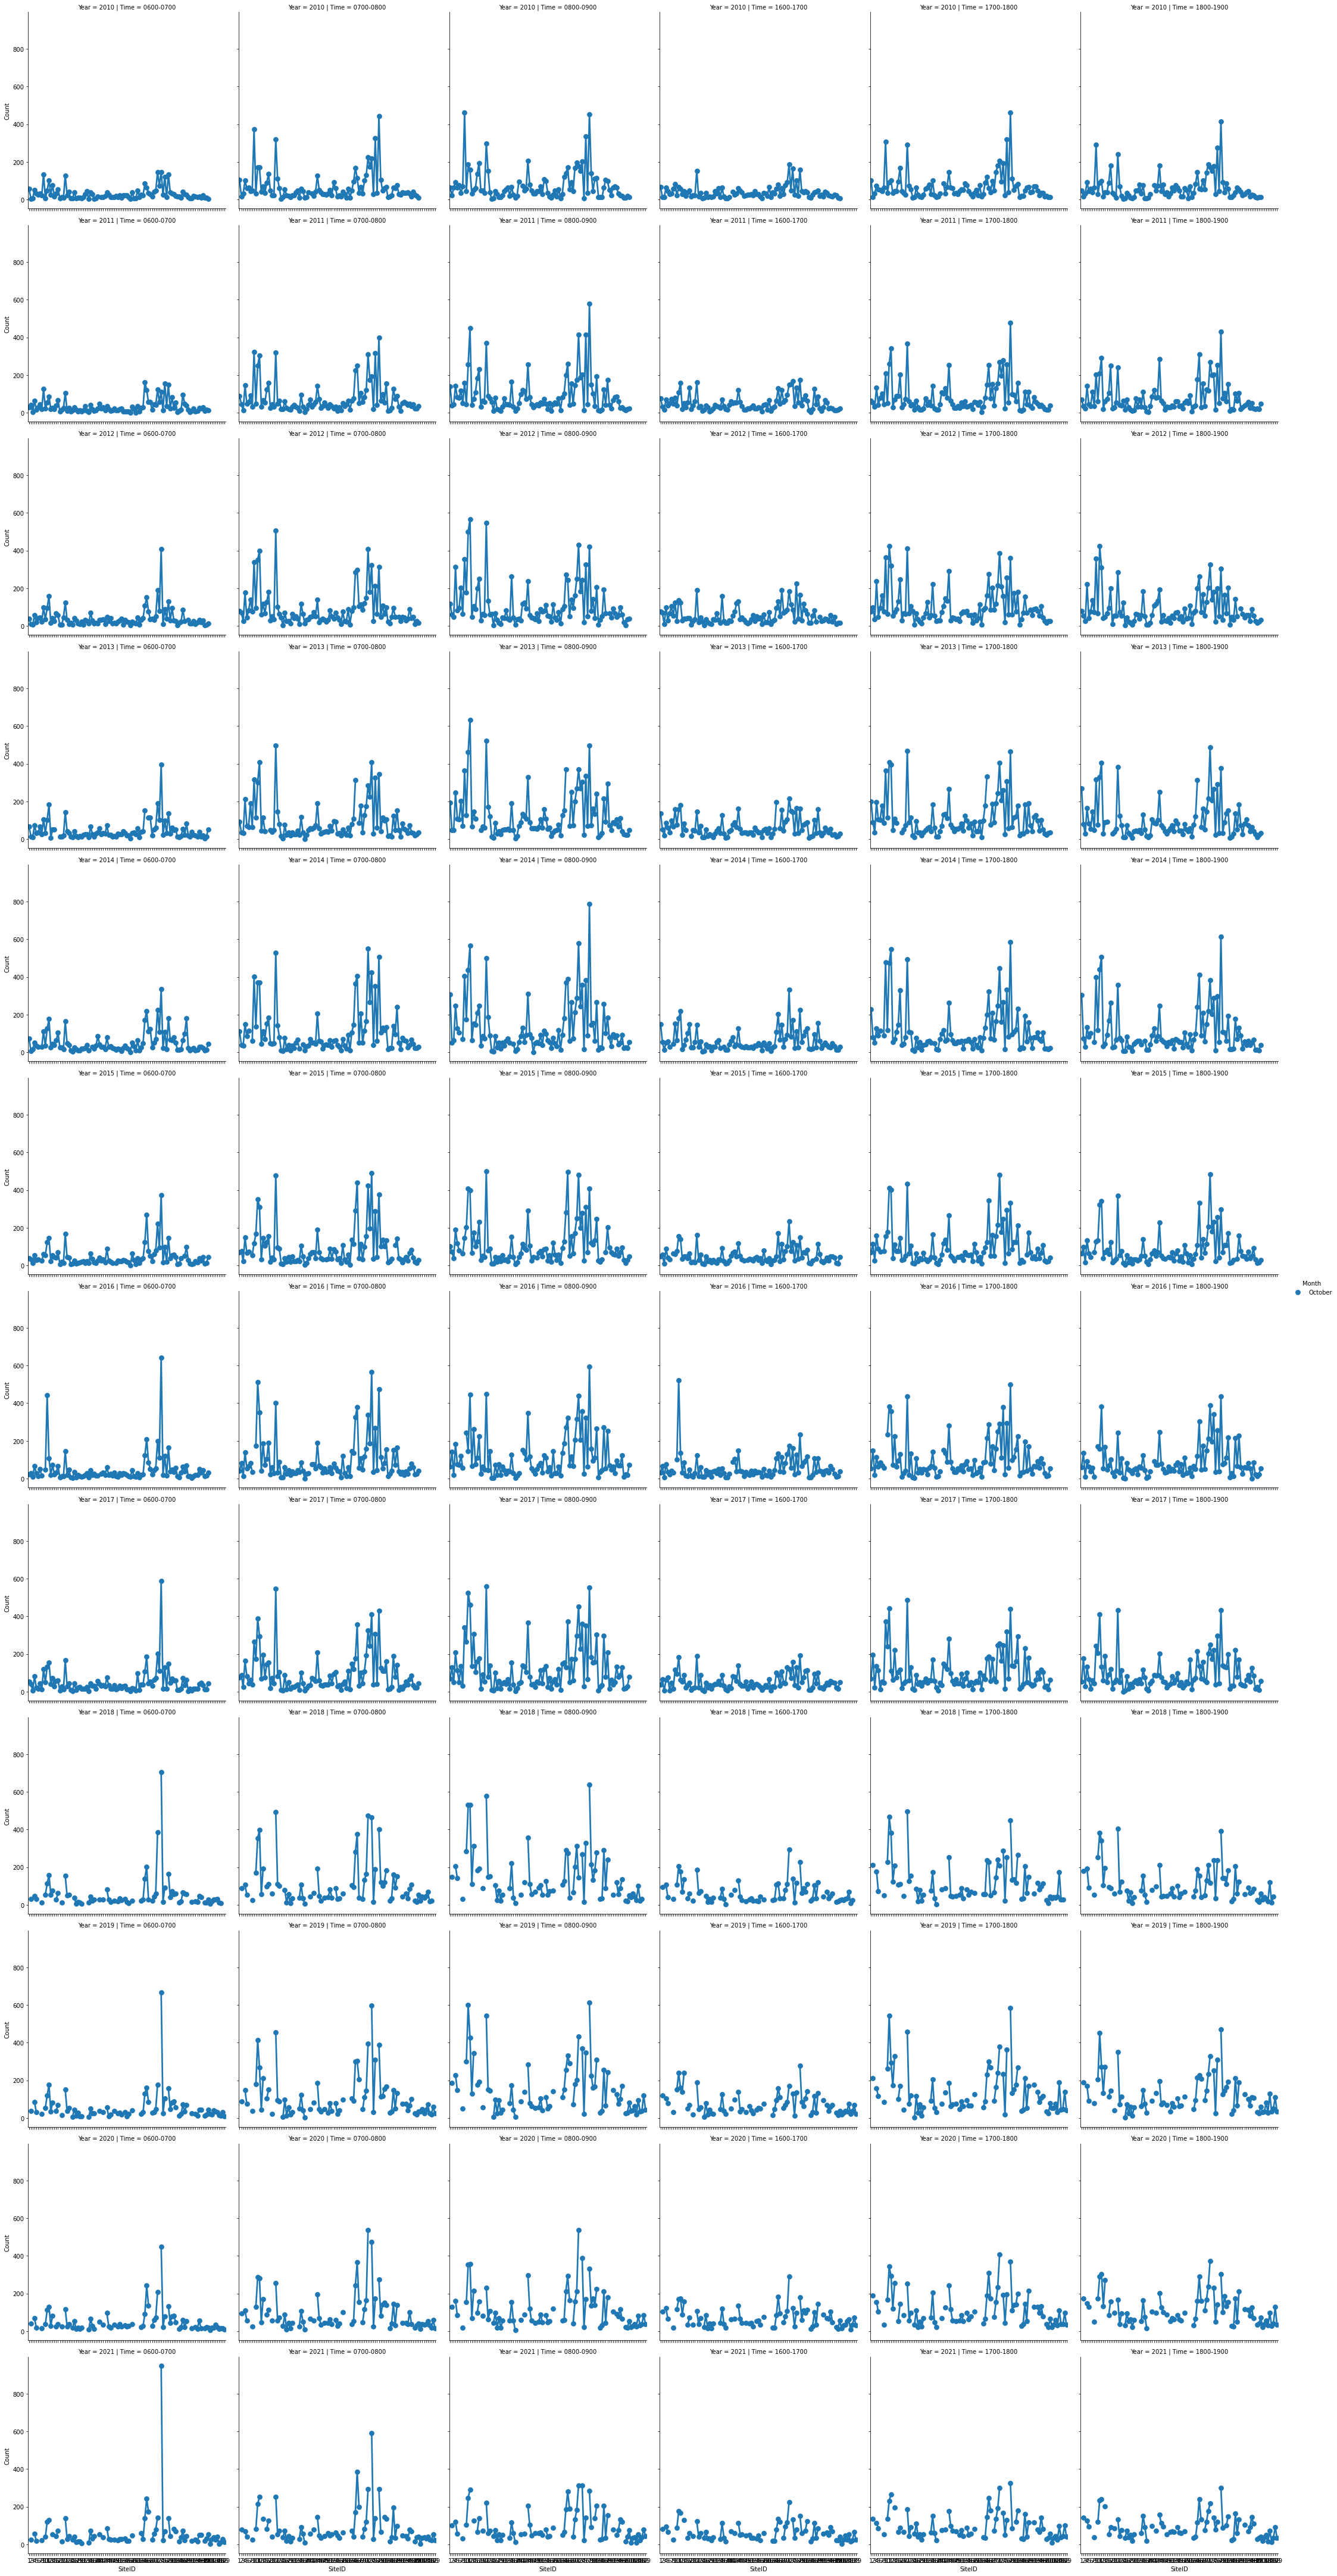

In [87]:
bicycle_merge2_catplot = sns.catplot(
                            x="SiteID",
                            y= "Count",
                            row= "Year",
                            col= "Time",
                            kind="point",
                            hue="Month",
                            data=bicycle_merge2[bicycle_merge2["Month"]=="October"])

In [ ]:
# Create a faceted scatterplot showing how counts vary by site id over the years and time.
# For October Only. 
bicycle_merge2_catplot = sns.catplot(
                            x="SiteID",
                            y= "Count",
                            row= "Year",
                            col= "Time",
                            kind="point",
                            hue="Month",
                            data=bicycle_merge2[bicycle_merge2["Month"]=="October"])

# Save the large visualisation for analysis.
bicyle_merge2_catplot.figsave("Caplot1.jpg",dpi=480)

# Side by Side barplot showing total count over year and month per site ID

<AxesSubplot:xlabel='Year', ylabel='TotalCount'>

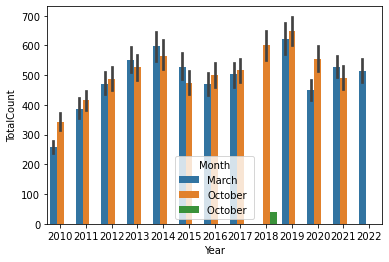

In [93]:
sns.barplot(x="Year",
           y="TotalCount",
           hue="Month",
           data=bicycle_merge2)

# Boxplots faceted by time

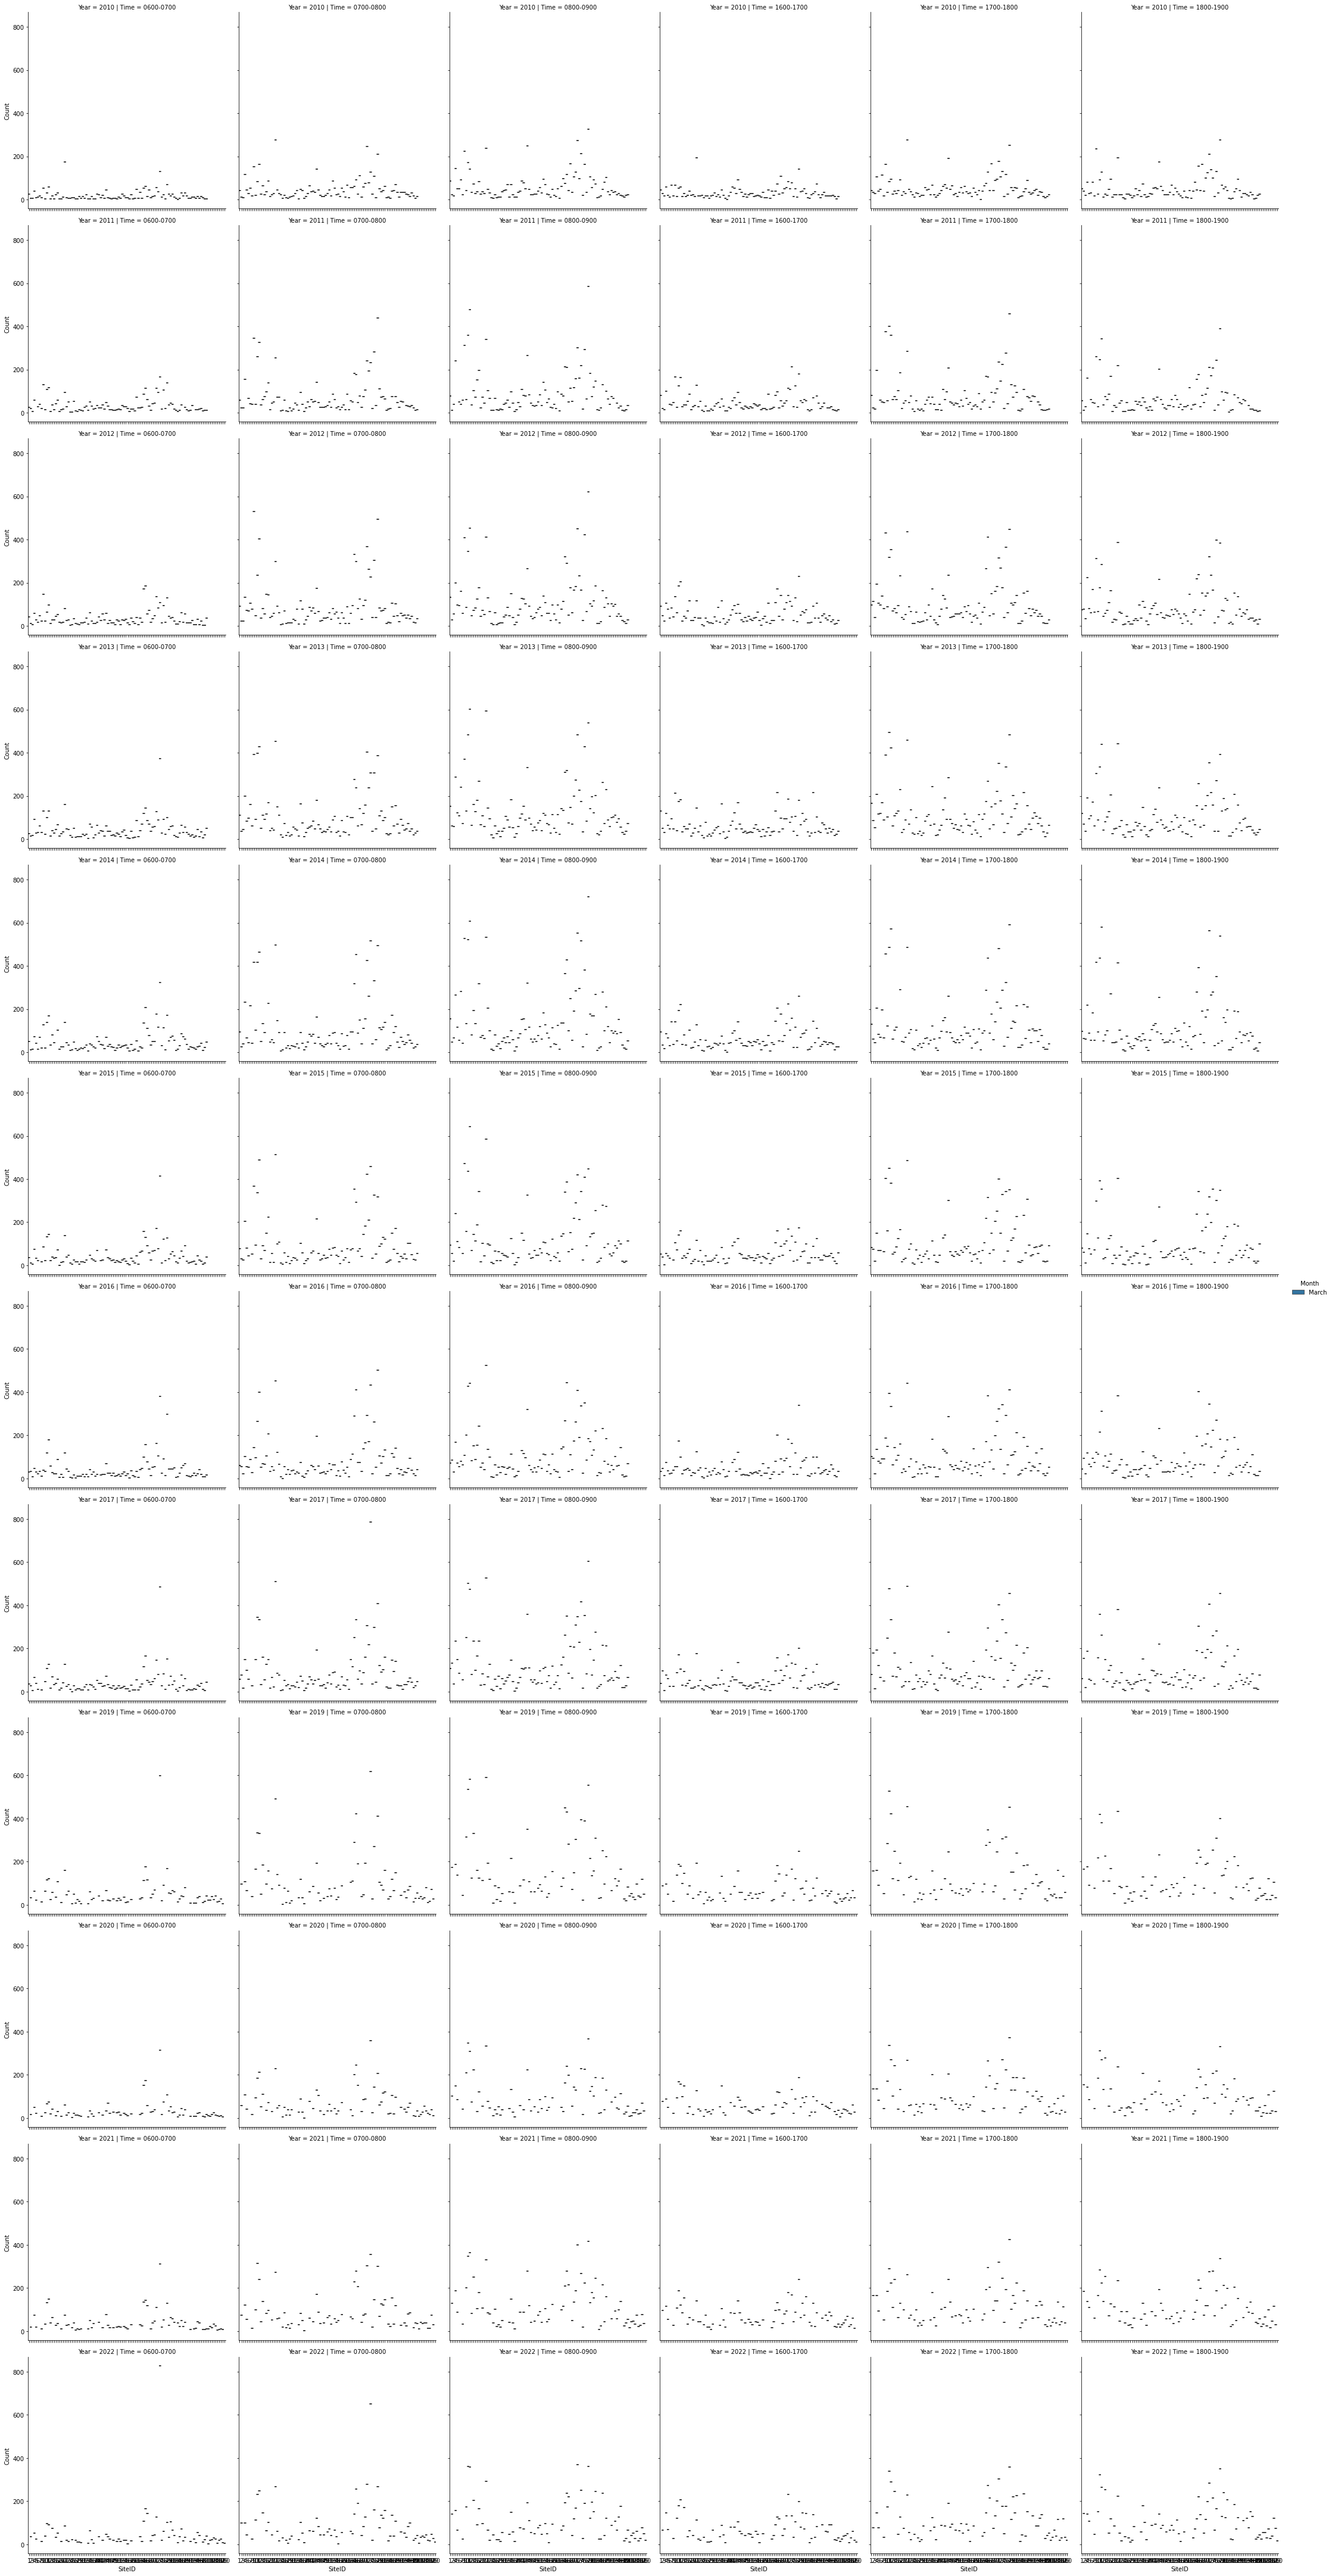

In [89]:
bicycle_merge2_catplot = sns.catplot(
                            x="SiteID",
                            y= "Count",
                            row= "Year",
                            col= "Time",
                            kind="box",
                            hue="Month",
                            data=bicycle_merge2[bicycle_merge2["Month"]=="March"])

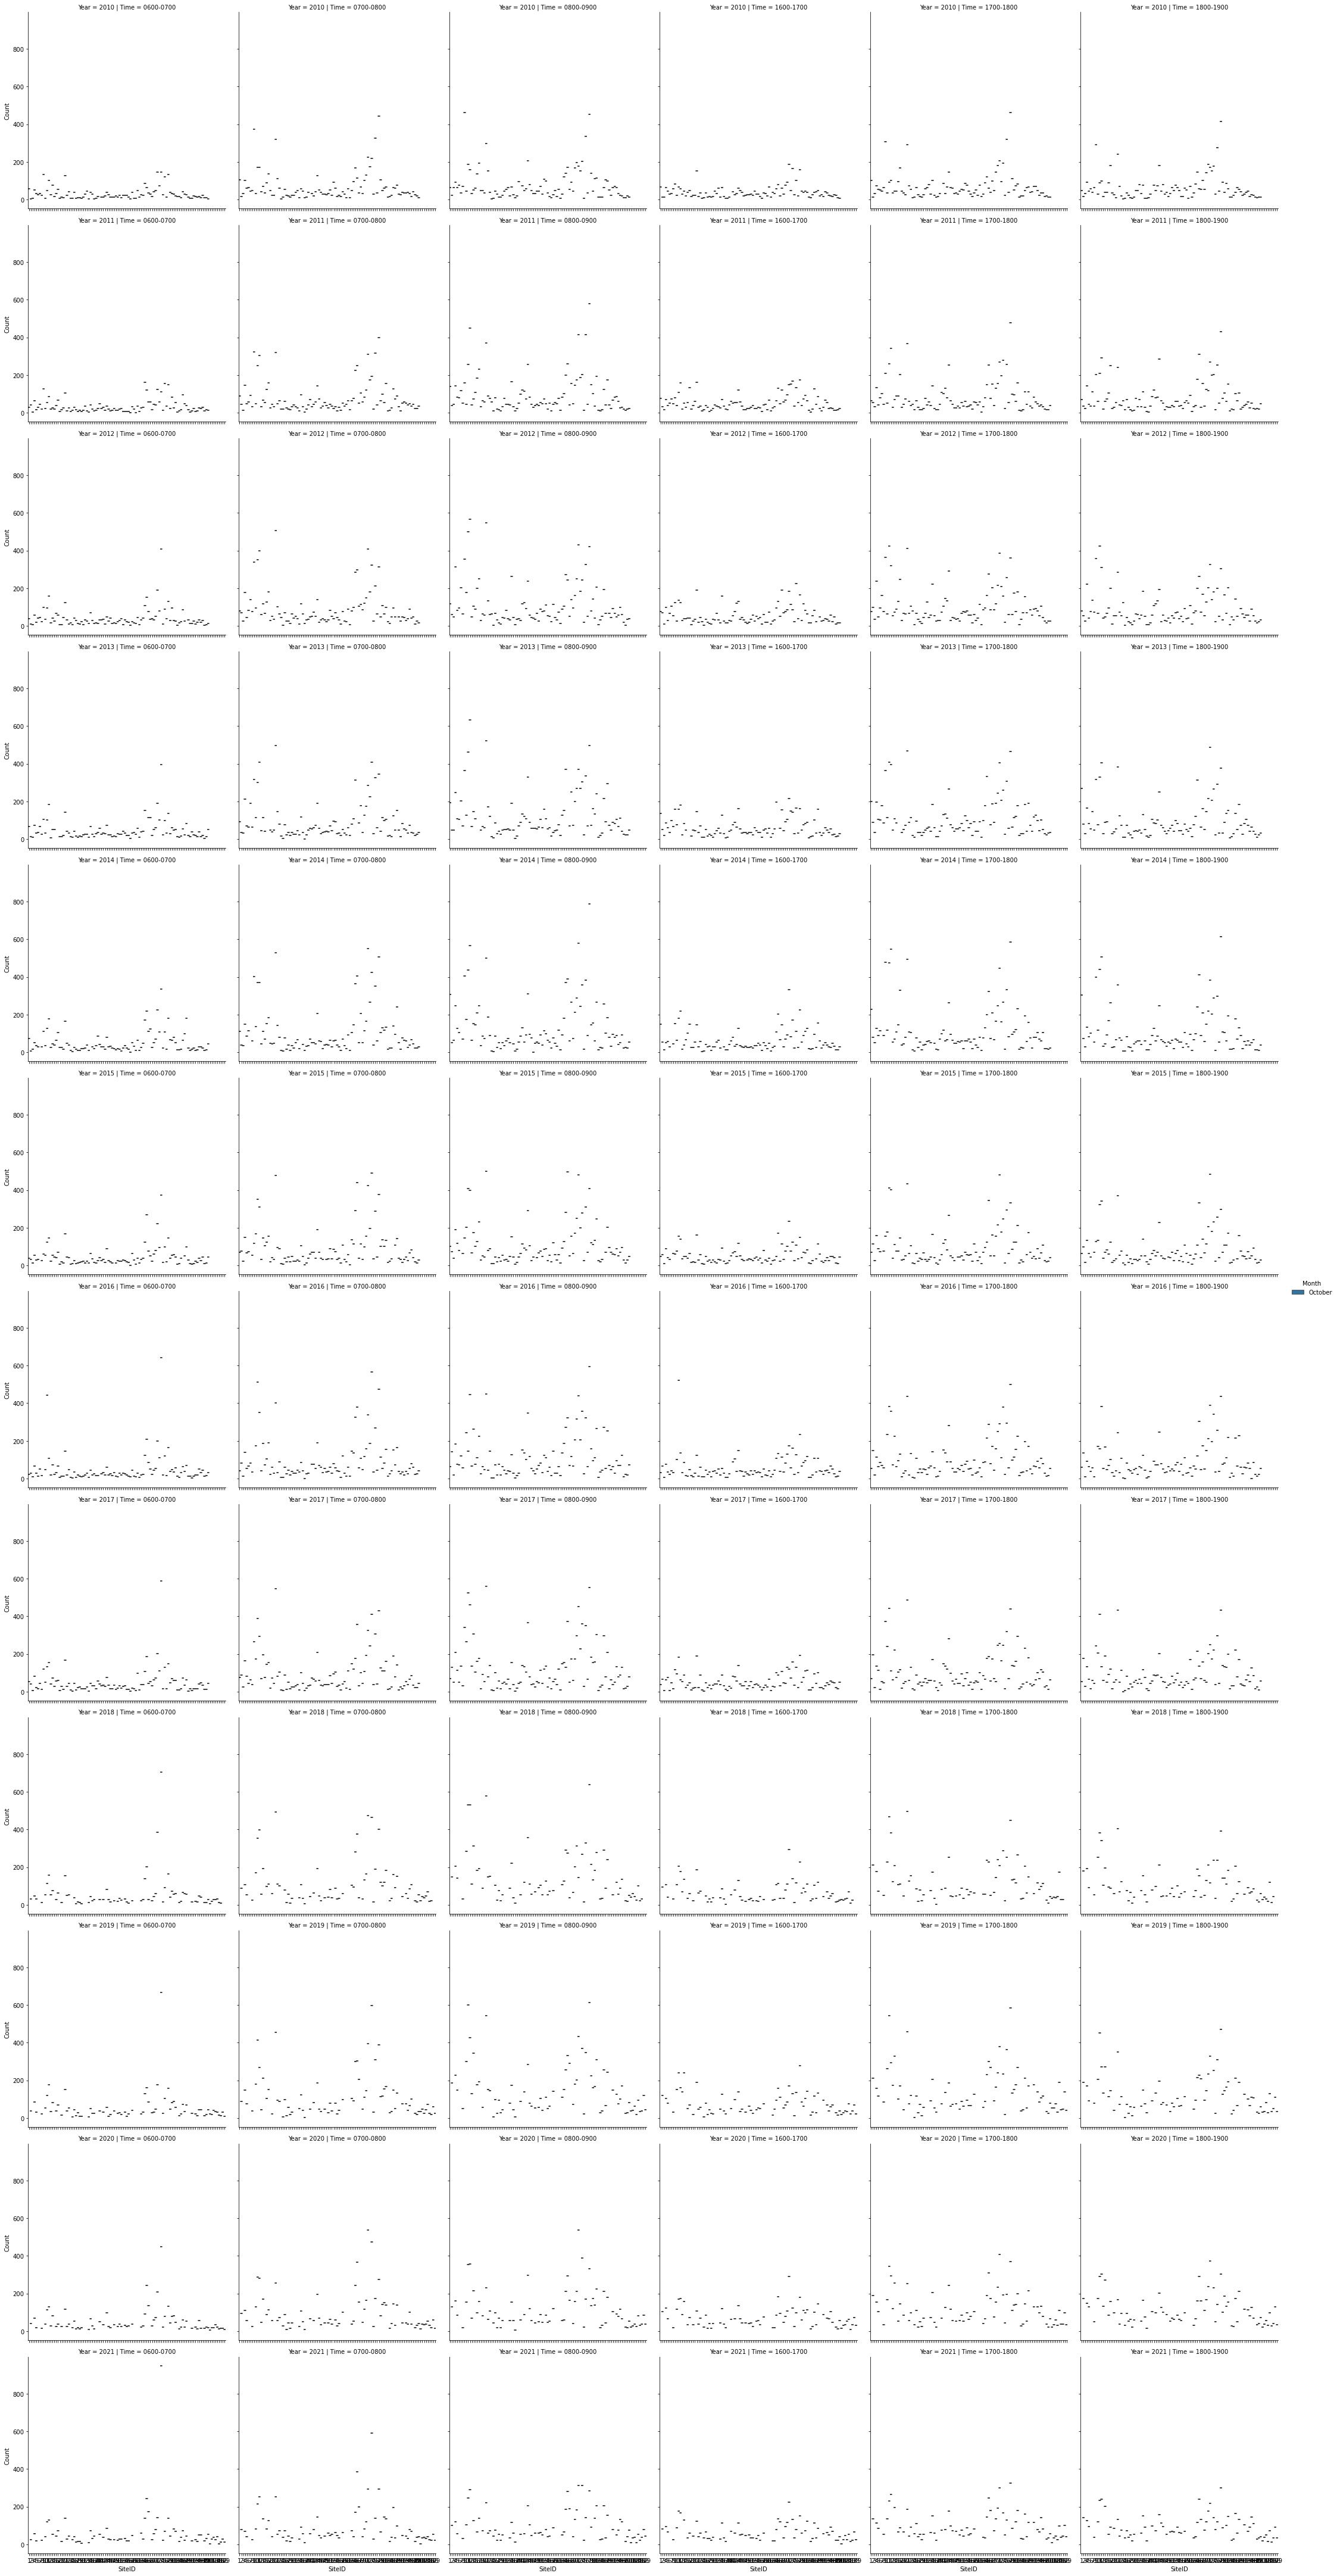

In [90]:
bicycle_merge2_catplot = sns.catplot(
                            x="SiteID",
                            y= "Count",
                            row= "Year",
                            col= "Time",
                            kind="box",
                            hue="Month",
                            data=bicycle_merge2[bicycle_merge2["Month"]=="October"])

# Using multilinear regression to find how each variable influences cycling count

** Planning to use this in R to find which variable influences the total cycle count the most.


# Creating interactive maps on Python

https://infopython.com/how-to-plot-longitude-and-latitude-data-using-python/

In [ ]:
plt.scatter(x=bicycle_site[X],y=bicycle_site[Y])

# OBSERVATIONS AND INSIGHTS

# Additional factors which could affect cylcing uptake

Ideas
- side by side barplot showing years and month
- remove outliers
- check boxplots faceted by time
- add a map
- spatial data: tableau or ARCGIS
- remove site id 110 as it doesn’t exist
- check total visits per site per year and month
- maybe use a dashboard on tableau
- and other factors which could affect cylcing based on researhc